**TP N°3-REGRESION**

1.   Asignatura: Inteligencia Artificial
2.   Alumno: Michaux Juan Martin






In [ ]:
# Cargo el dataset
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
insurance = pd.read_csv('insurance.csv')

--2024-09-07 10:21:15--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv.5’

insurance.csv.5     100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2024-09-07 10:21:15 (4.33 MB/s) - ‘insurance.csv.5’ saved [54288/54288]



In [ ]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
# Elimino las columnas categóricas para el análisis numérico
insurance_numeric = insurance.drop(columns=['sex', 'smoker', 'region'])
insurance_numeric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


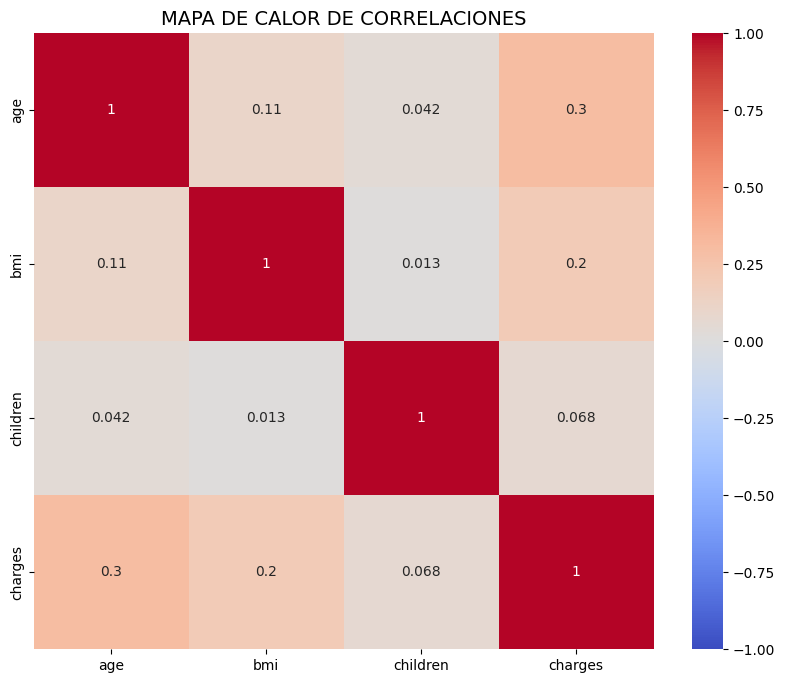

In [ ]:
# Creo un mapa de calor de las correlaciones entre variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(insurance_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('MAPA DE CALOR DE CORRELACIONES', fontsize=14)
plt.show()

In [ ]:
# Selecciono "age", "bmi" como características (X) y "charges" como variable objetivo (y)o
X = insurance[['age', 'bmi']].to_numpy()
y = insurance['charges'].to_numpy()

In [ ]:
#escalono los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Divido los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 2), (268, 2), (1070,), (268,))

In [ ]:
# Entreno y evalúo el modelo de Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f'Error Cuadrático Medio (MSE) - Regresión Lineal: {mse_lin:.2f}')


Error Cuadrático Medio (MSE) - Regresión Lineal: 131440262.76


In [ ]:
# Entreno y evalúo el modelo SVR (Support Vector Regression)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Error Cuadrático Medio (MSE) - SVR: {mse_svr:.2f}')

Error Cuadrático Medio (MSE) - SVR: 164993515.29


In [ ]:
# Comparo el rendimiento de los modelos
if mse_lin < mse_svr:
    print("El modelo de Regresión Lineal tiene mejor rendimiento.")
else:
    print("El modelo SVR tiene mejor rendimiento.")

El modelo de Regresión Lineal tiene mejor rendimiento.


**GRAFICO DE VISUALIZACION DE AMBOS MODELOS**

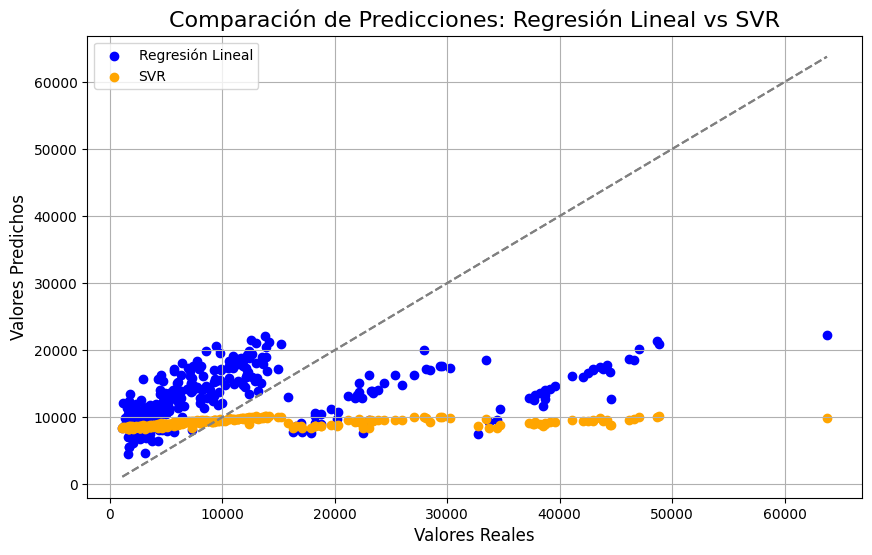

In [ ]:
# Visualizo las predicciones del modelo de Regresión Lineal y SVR
plt.figure(figsize=(10,6))

# Gráfico para la Regresión Lineal (color azul)
plt.scatter(y_test, y_pred_lin, color='blue', label='Regresión Lineal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

# Gráfico para el modelo SVR (color verde)
plt.scatter(y_test, y_pred_svr, color='orange', label='SVR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linestyle='--')

plt.title('Comparación de Predicciones: Regresión Lineal vs SVR', fontsize=16)
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Valores Predichos', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
